In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import sem

N: número de simulaciones
n: número de elementos tomados

In [2]:
N = 10
n = 15

**SE IMPORTAN LOS DATOS**

In [3]:
mef_df = pd.read_csv("Data.csv", delimiter=';', decimal=',')
display(mef_df)

,Simulación 1,Simulación 2,Simulación 3,Simulación 4,Simulación 5,Simulación 6,Simulación 7,Simulación 8,Simulación 9,Simulación 10
Elemento1,27.9539,28.0900,27.5466,27.6546,27.4002,27.5769,27.3680,27.4796,27.5190,27.4583
Elemento2,27.1430,27.4229,26.5716,26.6955,26.3902,26.3864,26.4503,26.6502,26.6276,26.3979
Elemento3,26.5354,26.8458,25.9503,26.0735,25.7696,25.7580,25.8377,26.0474,26.0153,25.7736
Elemento4,28.9643,29.3139,28.2945,28.4329,28.0887,28.0370,28.1821,28.4270,28.3819,28.0823
Elemento5,27.7763,28.1381,27.1156,27.2498,26.9156,26.8572,27.0122,27.2568,27.2066,26.9065
Elemento6,27.1270,27.5213,26.4431,26.5779,26.2403,26.1537,26.3525,26.6118,26.5490,26.2228
Elemento7,29.3488,29.6680,28.7048,28.8417,28.5028,28.4750,28.5815,28.8114,28.7780,28.5039
Elemento8,28.1778,28.5869,27.4669,27.6069,27.2565,27.1697,27.3728,27.6425,27.5770,27.2387
Elemento9,27.1857,27.6181,26.4596,26.5988,26.2482,26.1288,26.3803,26.6615,26.5842,26.2207
Elemento10,28.7583,29.1275,28.0749,28.2139,27.8678,27.8091,27.9678,28.2207,28.1692,27.8586


In [4]:
case_df = pd.read_csv("Case.csv", delimiter=';', decimal=',', usecols=[0,1])
display(case_df)

,Ensayo,Deformacion
0,1,160
1,2,159
2,3,160


**MÉTODO DE ELEMENTOS FINITOS**

Se calcula la tensión media de cada simulación y la desviación estándar experimental de la media de los 8 elementos tomados para cada simulación (Ecuación 4)

In [6]:
media_simulacion = []
std_simulacion = []
simulaciones = mef_df.columns[0:]
for simulacion in simulaciones:
    media_simulacion.append(mef_df[simulacion].mean())
    std_simulacion.append(sem(mef_df[simulacion])) 
mef_df_2 = pd.DataFrame(media_simulacion, columns = ['Media'])
mef_df_2['Desviacion estándar'] = std_simulacion
display(mef_df_2)

,Media,Desviacion estándar
0,27.595713,0.236031
1,27.934647,0.236208
2,26.959680,0.234764
3,27.091013,0.235374
4,26.764860,0.234203
5,26.722067,0.239616
6,26.851307,0.232478
7,27.083633,0.232330
8,27.041053,0.233350
9,26.760500,0.235625


Se calcula la media (Ecuación 2) y la desviación experimental de la media (Ecuación 3) de las 10 simulaciones efectuadas

In [8]:
Tension_mef = mef_df_2['Media'].astype('float').mean()
s_mef = sem(mef_df_2['Media'])
Tension_mef

27.080447333333332

Se calcula la incertidumbre combinada de la tensión

In [9]:
u_c = math.sqrt((sum(pow(mef_df_2['Desviacion estándar'].astype('float'),2)) / N) + pow(s_mef,2))
u_c

0.26593329230466806

Se calcula el factor de cobertura de una distribución tipo t

In [13]:
V_eff = pow(u_c,4) / ((pow(mef_df_2['Desviacion estándar'].astype('float').mean(),4) / (n-1))+(pow(s_mef,4) / (N*n-1)))
V_eff

22.791029036945623

Interpolamos linealmente entre los 2 valores más cercanos para un intervalo de confianza del 95% (20 - 2.09; 25 - 2.06)

In [16]:
k_t = (2.09-2.06)/(20-25)*(V_eff - 20) + 2.09
k_t

2.0732538257783264

La incertidumbre expandida para un nivel de confinza del 95% para la tensión obtenida del modelo de elementos finitos es:

In [17]:
U_mef = k_t * u_c
U_mef

0.551347215672479

**VALIDACIÓN EXPERIMENTAL** (Monte Carlo)

Se elige el número de reiteraciones de Monte Carlo

In [21]:
M = 100000
#Coeficiente de expansión térmica del material de ensayo
alpha_B = 0.0000116
#Coeficiente de expansión térmica del material utilizado por el fabricante
alpha_A = 0.0000118

incertidumbres_df: Tabla con los valores generados para cada una de las fuentes de incertidumbre

ensayos_df: Tabla con los valores medidos teniendo en cuenta la tolerancia sobre la medida del equipo

In [22]:
incertidumbres_df = pd.DataFrame()
ensayos_df = pd.DataFrame()


Incertidumbre por la tolerancia del equipo de medida

In [24]:
tolerancia_def = 1
i = 1
for ensayo in case_df['Deformacion']:
    ensayos_df['Ensayo ' + str(i)] = np.random.uniform(low=ensayo-tolerancia_def, high=ensayo+tolerancia_def, size=M)
    i = i+1

Incertidumbre en el factor de galga

In [25]:
K = 2.07
tolerancia_K = 0.01
incertidumbres_df['Factor de galga'] = np.random.uniform(low=K-tolerancia_K, high=K+tolerancia_K, size=M)

Incertidumbre en el factor de sensibilidad transversal

In [26]:
K_t = 0.001
tolerancia_Kt = 0.001
incertidumbres_df['Factor de sensibilidad transversal'] = np.random.uniform(low=K_t-tolerancia_Kt, high=K_t+tolerancia_Kt, size=M)

Incertidumbre en el coeficiente de dilatación térmico

In [27]:
alpha_g = 0.01
tolerancia_alpha = 0.00005
incertidumbres_df['Coeficiente dilatacion termico'] = np.random.uniform(low=alpha_g-tolerancia_alpha, high=alpha_g+tolerancia_alpha, size=M)

Incertidumbre en el coeficiente de Poisson de la galga

In [28]:
poisson = 0.285
tolerancia_poisson = 0.01
incertidumbres_df['Coeficiente Poisson'] = np.random.uniform(low=poisson-tolerancia_poisson, high=poisson+tolerancia_poisson, size=M)

Incertidumbre en la temperatura de ensayo

In [29]:
Temp_ensayo = 18 #ºC
tolerancia_temp = 1
incertidumbres_df['Temperatura de ensayo'] = np.random.uniform(low=Temp_ensayo-tolerancia_temp, high=Temp_ensayo+tolerancia_temp, size=M)

Incertidumbre en la temperatura de calibración

In [30]:
Temp_calib = 20 #ºC
incertidumbres_df['Temperatura de calibracion'] = np.random.uniform(low=Temp_calib-tolerancia_temp, high=Temp_calib+tolerancia_temp, size=M)

Incertidumbre en la carga aplicada

In [31]:
F = 14.86 #N
incertidumbre_F = 0.00829
incertidumbres_df['Carga aplicada'] = np.random.normal(loc=F, scale=incertidumbre_F, size=M)

Incertidumbre en la deformación aparente

In [32]:
epsilon = -31.8 + 2.77*Temp_ensayo - 0.0655*pow(Temp_ensayo,2) + 0.000328*pow(Temp_ensayo,3) - 0.000000326*pow(Temp_ensayo,4)
tolerancia_def_ap = 1.7
incertidumbres_df['Deformación aparente'] = np.random.uniform(low=epsilon-tolerancia_def_ap, high=epsilon+tolerancia_def_ap, size=M)

Incertidumbre en el módulo de Young de la galga

In [33]:
G = 211 #GPa
incertidumbre_G = 2.11
incertidumbres_df['Modulo Young'] = np.random.normal(loc=G, scale=incertidumbre_G, size=M)

Incertidumbre en el ángulo de montaje

In [34]:
cita_montaje = 0.02 #rads
tolerancia_cita_montaje = 0.000873
incertidumbres_df['Angulo montaje'] = np.random.uniform(low=cita_montaje-tolerancia_cita_montaje, high=cita_montaje+tolerancia_cita_montaje, size=M)

ENSAYO 1

In [35]:
error_no_linealidad = []
error_temperatura = []
error_alineamiento = []
error_sensibilidad_transversal = []
deformacion_corregida = []
tension = []
i = 0
for deformacion in np.array(ensayos_df['Ensayo 1']):
    error_no_linealidad.append(deformacion - (2 * deformacion)/(2 - (0.000001 * deformacion * np.array(incertidumbres_df['Factor de galga'])[i])))
    error_temperatura.append(((2)/(np.array(incertidumbres_df['Factor de galga'])[i] * (1 + np.array(incertidumbres_df['Coeficiente dilatacion termico'])[i] * (np.array(incertidumbres_df['Temperatura de ensayo'])[i] - np.array(incertidumbres_df['Temperatura de calibracion'])[i])))) * (np.array(incertidumbres_df['Deformación aparente'])[i] + (alpha_B - alpha_A)*(np.array(incertidumbres_df['Temperatura de ensayo'])[i] - np.array(incertidumbres_df['Temperatura de calibracion'])[i])))
    error_alineamiento.append(deformacion*(1 - (2)/((1 - np.array(incertidumbres_df['Coeficiente Poisson'])[i]) + (1 + np.array(incertidumbres_df['Coeficiente Poisson'])[i]) * math.cos(np.array(incertidumbres_df['Angulo montaje'])[i]))))
    epsilon_coeff = ((1 - math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])) - np.array(incertidumbres_df['Coeficiente Poisson'])[i] * (1 + math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i]))) / ((1 + math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])) - np.array(incertidumbres_df['Coeficiente Poisson'])[i] * (1 - math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])))
    error_sensibilidad_transversal.append((np.array(incertidumbres_df['Factor de sensibilidad transversal'])[i] * (epsilon_coeff + poisson)) / (1 - poisson*np.array(incertidumbres_df['Factor de sensibilidad transversal'])[i]))
    error = error_no_linealidad[i] + error_temperatura[i] + error_alineamiento[i] + error_sensibilidad_transversal[i]
    deformacion_corregida.append(deformacion - error)
    tension.append(deformacion_corregida[i]* 0.000001 * np.array(incertidumbres_df['Modulo Young'])[i] * 1000)
    i = i + 1
ensayo1_df = pd.DataFrame()
ensayo1_df['Deformacion'] = ensayos_df['Ensayo 1']
ensayo1_df['Error No Linealidad'] = error_no_linealidad
ensayo1_df['Error Temperatura'] = error_temperatura
ensayo1_df['Error Alineamiento'] = error_alineamiento
ensayo1_df['Error Sensibilidad Transversal'] = error_sensibilidad_transversal
ensayo1_df['Defo Ermacion corregida'] = deformacion_corregida
ensayo1_df['Tension'] = tension
ensayo1_df.head()

,Deformacion,Error No Linealidad,Error Temperatura,Error Alineamiento,Error Sensibilidad Transversal,Defo Ermacion corregida,Tension
0,159.171696,-0.026241,-1.324556,-0.019940,2.004211e-05,160.542414,33.759807
1,159.387007,-0.026392,-2.255884,-0.021162,-1.137433e-07,161.690445,33.814916
2,159.153148,-0.026146,-1.174172,-0.019372,5.738356e-08,160.372837,33.310360
3,160.389075,-0.026737,-0.219610,-0.021011,4.408497e-06,160.656429,33.659448
4,159.289185,-0.026262,-2.204957,-0.022191,1.577987e-06,161.542594,34.067515


ENSAYO 2

In [36]:
error_no_linealidad = []
error_temperatura = []
error_alineamiento = []
error_sensibilidad_transversal = []
deformacion_corregida = []
tension = []
i = 0
for deformacion in np.array(ensayos_df['Ensayo 2']):
    error_no_linealidad.append(deformacion - (2 * deformacion)/(2 - (0.000001 * deformacion * np.array(incertidumbres_df['Factor de galga'])[i])))
    error_temperatura.append(((2)/(np.array(incertidumbres_df['Factor de galga'])[i] * (1 + np.array(incertidumbres_df['Coeficiente dilatacion termico'])[i] * (np.array(incertidumbres_df['Temperatura de ensayo'])[i] - np.array(incertidumbres_df['Temperatura de calibracion'])[i])))) * (np.array(incertidumbres_df['Deformación aparente'])[i] + (alpha_B - alpha_A)*(np.array(incertidumbres_df['Temperatura de ensayo'])[i] - np.array(incertidumbres_df['Temperatura de calibracion'])[i])))
    error_alineamiento.append(deformacion*(1 - (2)/((1 - np.array(incertidumbres_df['Coeficiente Poisson'])[i]) + (1 + np.array(incertidumbres_df['Coeficiente Poisson'])[i]) * math.cos(np.array(incertidumbres_df['Angulo montaje'])[i]))))
    epsilon_coeff = ((1 - math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])) - np.array(incertidumbres_df['Coeficiente Poisson'])[i] * (1 + math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i]))) / ((1 + math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])) - np.array(incertidumbres_df['Coeficiente Poisson'])[i] * (1 - math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])))
    error_sensibilidad_transversal.append((np.array(incertidumbres_df['Factor de sensibilidad transversal'])[i] * (epsilon_coeff + poisson)) / (1 - poisson*np.array(incertidumbres_df['Factor de sensibilidad transversal'])[i]))
    error = error_no_linealidad[i] + error_temperatura[i] + error_alineamiento[i] + error_sensibilidad_transversal[i]
    deformacion_corregida.append(deformacion - error)
    tension.append(deformacion_corregida[i]* 0.000001 * np.array(incertidumbres_df['Modulo Young'])[i] * 1000)
    i = i + 1
ensayo2_df = pd.DataFrame()
ensayo2_df['Deformacion'] = ensayos_df['Ensayo 1']
ensayo2_df['Error No Linealidad'] = error_no_linealidad
ensayo2_df['Error Temperatura'] = error_temperatura
ensayo2_df['Error Alineamiento'] = error_alineamiento
ensayo2_df['Error Sensibilidad Transversal'] = error_sensibilidad_transversal
ensayo2_df['Deformacion corregida'] = deformacion_corregida
ensayo2_df['Tension'] = tension
ensayo2_df.head()

,Deformacion,Error No Linealidad,Error Temperatura,Error Alineamiento,Error Sensibilidad Transversal,Deformacion corregida,Tension
0,159.171696,-0.026267,-1.324556,-0.019950,2.004211e-05,160.619659,33.776050
1,159.387007,-0.026198,-2.255884,-0.021084,-1.137433e-07,161.103407,33.692147
2,159.153148,-0.025834,-1.174172,-0.019256,5.738356e-08,159.421918,33.112849
3,160.389075,-0.026585,-0.219610,-0.020951,4.408497e-06,160.198259,33.563456
4,159.289185,-0.026150,-2.204957,-0.022144,1.577987e-06,161.203878,33.996084


ENSAYO 3

In [37]:
error_no_linealidad = []
error_temperatura = []
error_alineamiento = []
error_sensibilidad_transversal = []
deformacion_corregida = []
tension = []
i = 0
for deformacion in np.array(ensayos_df['Ensayo 3']):
    error_no_linealidad.append(deformacion - (2 * deformacion)/(2 - (0.000001 * deformacion * np.array(incertidumbres_df['Factor de galga'])[i])))
    error_temperatura.append(((2)/(np.array(incertidumbres_df['Factor de galga'])[i] * (1 + np.array(incertidumbres_df['Coeficiente dilatacion termico'])[i] * (np.array(incertidumbres_df['Temperatura de ensayo'])[i] - np.array(incertidumbres_df['Temperatura de calibracion'])[i])))) * (np.array(incertidumbres_df['Deformación aparente'])[i] + (alpha_B - alpha_A)*(np.array(incertidumbres_df['Temperatura de ensayo'])[i] - np.array(incertidumbres_df['Temperatura de calibracion'])[i])))
    error_alineamiento.append(deformacion*(1 - (2)/((1 - np.array(incertidumbres_df['Coeficiente Poisson'])[i]) + (1 + np.array(incertidumbres_df['Coeficiente Poisson'])[i]) * math.cos(np.array(incertidumbres_df['Angulo montaje'])[i]))))
    epsilon_coeff = ((1 - math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])) - np.array(incertidumbres_df['Coeficiente Poisson'])[i] * (1 + math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i]))) / ((1 + math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])) - np.array(incertidumbres_df['Coeficiente Poisson'])[i] * (1 - math.cos(2 * np.array(incertidumbres_df['Angulo montaje'])[i])))
    error_sensibilidad_transversal.append((np.array(incertidumbres_df['Factor de sensibilidad transversal'])[i] * (epsilon_coeff + poisson)) / (1 - poisson*np.array(incertidumbres_df['Factor de sensibilidad transversal'])[i]))
    error = error_no_linealidad[i] + error_temperatura[i] + error_alineamiento[i] + error_sensibilidad_transversal[i]
    deformacion_corregida.append(deformacion - error)
    tension.append(deformacion_corregida[i]* 0.000001 * np.array(incertidumbres_df['Modulo Young'])[i] * 1000)
    i = i + 1
ensayo3_df = pd.DataFrame()
ensayo3_df['Deformacion'] = ensayos_df['Ensayo 1']
ensayo3_df['Error No Linealidad'] = error_no_linealidad
ensayo3_df['Error Temperatura'] = error_temperatura
ensayo3_df['Error Alineamiento'] = error_alineamiento
ensayo3_df['Error Sensibilidad Transversal'] = error_sensibilidad_transversal
ensayo3_df['Deformacion corregida'] = deformacion_corregida
ensayo3_df['Tension'] = tension
ensayo3_df.head()

,Deformacion,Error No Linealidad,Error Temperatura,Error Alineamiento,Error Sensibilidad Transversal,Deformacion corregida,Tension
0,159.171696,-0.026433,-1.324556,-0.020013,2.004211e-05,161.122996,33.881895
1,159.387007,-0.026736,-2.255884,-0.021299,-1.137433e-07,162.727191,34.031735
2,159.153148,-0.026349,-1.174172,-0.019447,5.738356e-08,160.990008,33.438550
3,160.389075,-0.026482,-0.219610,-0.020911,4.408497e-06,159.890122,33.498898
4,159.289185,-0.026336,-2.204957,-0.022223,1.577987e-06,161.766979,34.114835


In [38]:
tension_df = pd.DataFrame()
tension_df['Ensayo 1'] = np.array(ensayo1_df['Tension'])
tension_df['Ensayo 2'] = np.array(ensayo2_df['Tension'])
tension_df['Ensayo 3'] = np.array(ensayo2_df['Tension'])
tensiones = []
i = 0
for tension in tension_df['Ensayo 1']:
    tensiones.append((tension + np.array(tension_df['Ensayo 2'])[i] + np.array(tension_df['Ensayo 3'])[i])/3)
tension_df['Tension media'] = tensiones

TENSION MEDIA EXPERIMENTAL

In [39]:
Tension_MMC = tension_df['Tension media'].astype('float').mean()
s_MMC = tension_df['Tension media'].std()
Tension_MMC

33.86198808030111

INCERTIDUMBRE EXPANDIDA EXPERIMENTAL

In [43]:
U_MMC = 2*s_MMC
U_MMC

0.2766878853209538

Text(0.5, 0, 'Tensión [MPa]')

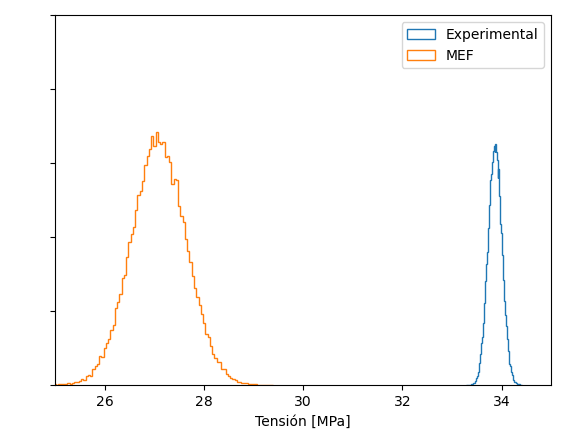

In [54]:
plt.hist(tensiones, bins=100, histtype='step')
plt.hist(np.random.normal(loc=Tension_mef, scale=U_mef, size=M), bins=100, histtype='step')
plt.xlim(25,35)
plt.ylim(0, 5000)
plt.legend(["Experimental","MEF"])
plt.yticks(color='w')
plt.xlabel('Tensión [MPa]')


Comprobar correlación del Método de Elementos Finitos con los resultados experimentales de tensión. Si E_N < 1 significa que el MEF repodruce el resultado experimental

In [45]:
E_N = abs(Tension_mef - Tension_MMC)/ math.sqrt(pow(U_mef,2) - pow(U_MMC,2))
E_N

14.220236637876363

El MEF no repodruce fielmente el resultado experimental